In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler # Feature Scaling 
from sklearn.ensemble import RandomForestRegressor  # numeric and categoric data together
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

# Step 1:- Importing the data set and cleaning it

In [136]:
file_path = 'SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx'
years = range(2010,2017)


In [137]:
df_temp = pd.read_excel(file_path,sheet_name=f'{years[6]}_Summary_Commodity')
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Commodity  code                                         264 non-null    object 
 1   Commodity Name                                          264 non-null    object 
 2   Substance                                               264 non-null    object 
 3   Unit                                                    264 non-null    object 
 4   Supply Chain Emission Factors without Margins           264 non-null    float64
 5   Margins of Supply Chain Emission Factors                264 non-null    float64
 6   Supply Chain Emission Factors with Margins              264 non-null    float64
 7   Unnamed: 7                                              0 non-null      float64
 8   DQ ReliabilityScore of Factors without M

In [138]:
all_data = []

for year in years:
    try:
        df_com = pd.read_excel(file_path, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(file_path, sheet_name=f'{year}_Detail_Industry')
        
        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year
        
        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)
        
        df_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)
        
        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))
        
    except Exception as e:
        print(f"Error processing year {year}: {e}")

In [139]:
df = pd.concat(all_data, ignore_index=True)
df.isnull().sum()
print(df.shape)


(22091, 15)


In [140]:
df.drop(columns=['Unnamed: 7'],inplace=True)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22091 entries, 0 to 22090
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22091 non-null  object 
 1   Name                                                    22091 non-null  object 
 2   Substance                                               22091 non-null  object 
 3   Unit                                                    22091 non-null  object 
 4   Supply Chain Emission Factors without Margins           22091 non-null  float64
 5   Margins of Supply Chain Emission Factors                22091 non-null  float64
 6   Supply Chain Emission Factors with Margins              22091 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22091 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [142]:
df.describe()

,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Year
count,22091.000000,22091.000000,22091.000000,22091.000000,22091.000000,22091.0,22091.000000,22091.0,22091.000000
mean,0.084811,0.012858,0.097686,3.307999,2.571409,1.0,2.632067,1.0,2013.000091
std,0.267045,0.078721,0.288998,0.499632,0.494886,0.0,1.135649,0.0,2.000045
min,0.000000,0.000000,0.000000,2.000000,2.000000,1.0,1.000000,1.0,2010.000000
25%,0.000000,0.000000,0.000000,3.000000,2.000000,1.0,1.000000,1.0,2011.000000
50%,0.002000,0.000000,0.003000,3.000000,3.000000,1.0,3.000000,1.0,2013.000000
75%,0.044000,0.000000,0.052000,4.000000,3.000000,1.0,3.000000,1.0,2015.000000
max,7.228000,3.349000,7.290000,4.000000,3.000000,1.0,5.000000,1.0,2016.000000


In [143]:
df.isnull().sum()

Code                                                      0
Name                                                      0
Substance                                                 0
Unit                                                      0
Supply Chain Emission Factors without Margins             0
Margins of Supply Chain Emission Factors                  0
Supply Chain Emission Factors with Margins                0
DQ ReliabilityScore of Factors without Margins            0
DQ TemporalCorrelation of Factors without Margins         0
DQ GeographicalCorrelation of Factors without Margins     0
DQ TechnologicalCorrelation of Factors without Margins    0
DQ DataCollection of Factors without Margins              0
Source                                                    0
Year                                                      0
dtype: int64

# Step 2:- Plotting the requirend Analysis

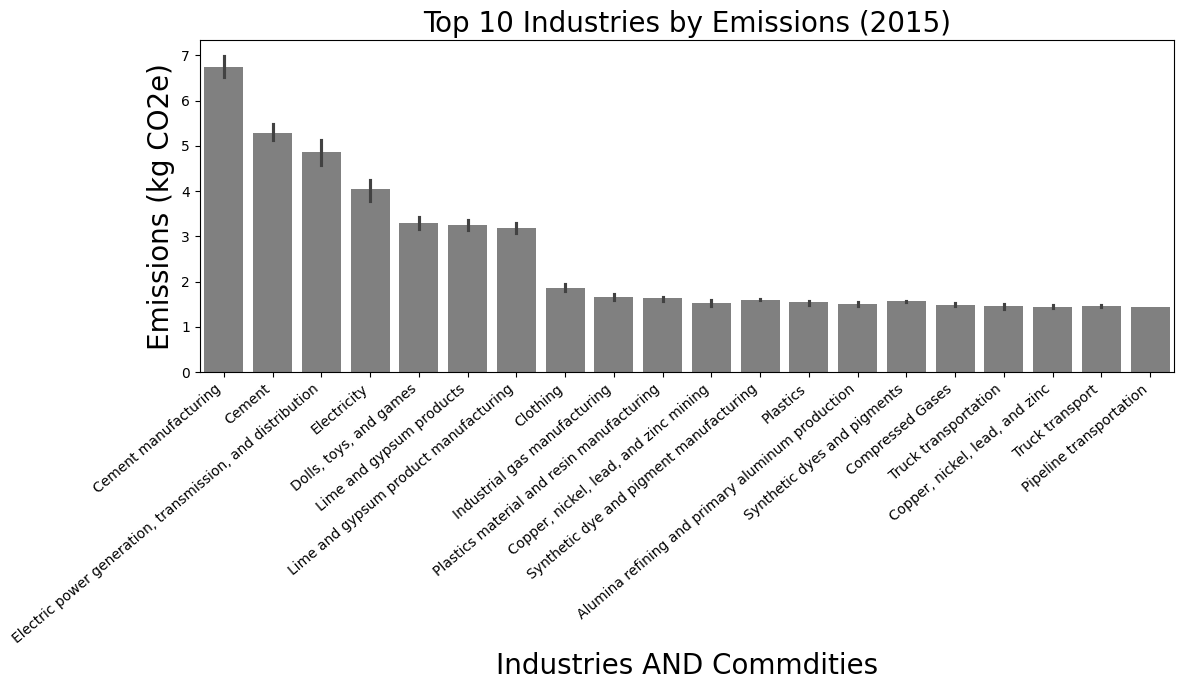

In [144]:

top_10 = df.sort_values(by="Supply Chain Emission Factors with Margins", ascending=False).head(100)
plt.figure(figsize=(12,7))
sns.barplot(data=top_10, x='Name', y='Supply Chain Emission Factors with Margins' , color='grey')
plt.title('Top 10 Industries by Emissions (2015)', fontsize=20)
plt.xlabel('Industries AND Commdities',fontsize = 20)
plt.ylabel('Emissions (kg CO2e)',fontsize = 20)
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

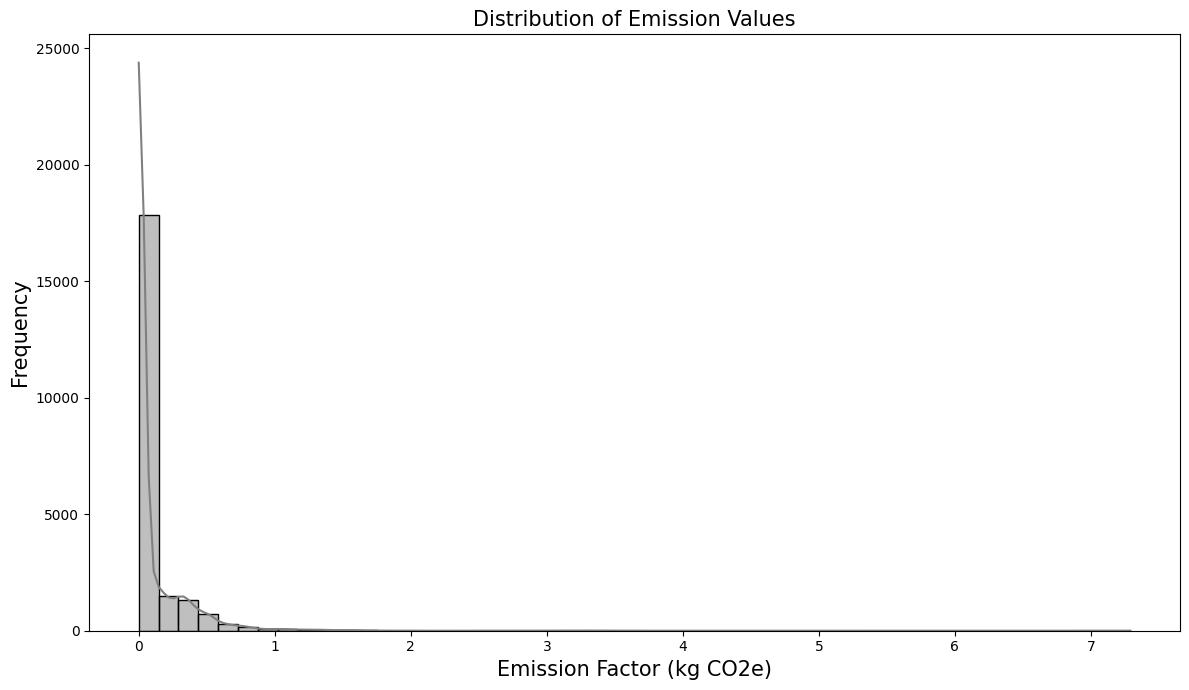

In [145]:
plt.figure(figsize=(12,7))
sns.histplot(df["Supply Chain Emission Factors with Margins"], bins=50, kde=True, color='grey')
plt.title("Distribution of Emission Values", fontsize=15)
plt.xlabel("Emission Factor (kg CO2e)",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)
plt.tight_layout()
plt.show()

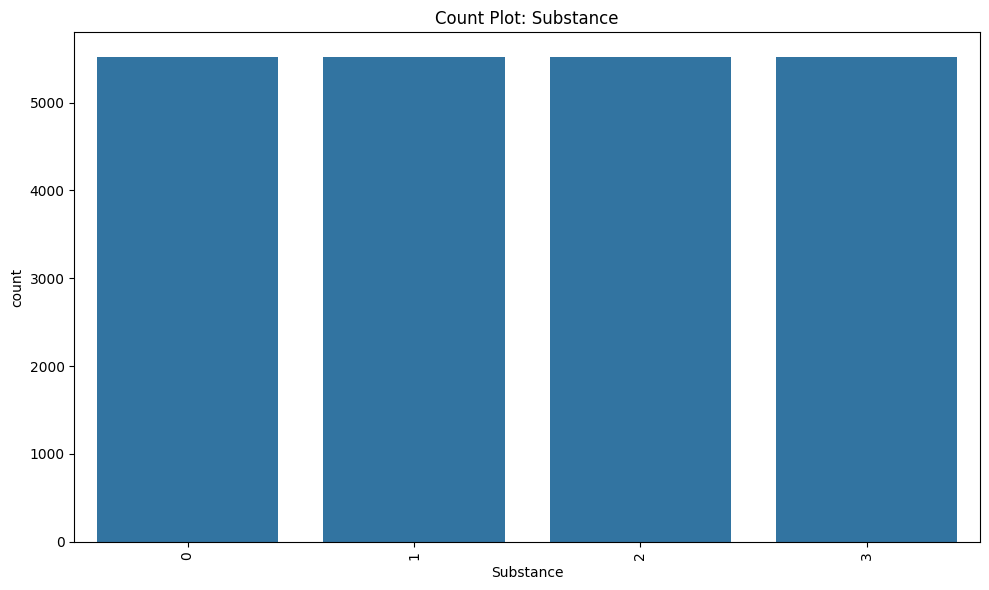

In [155]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

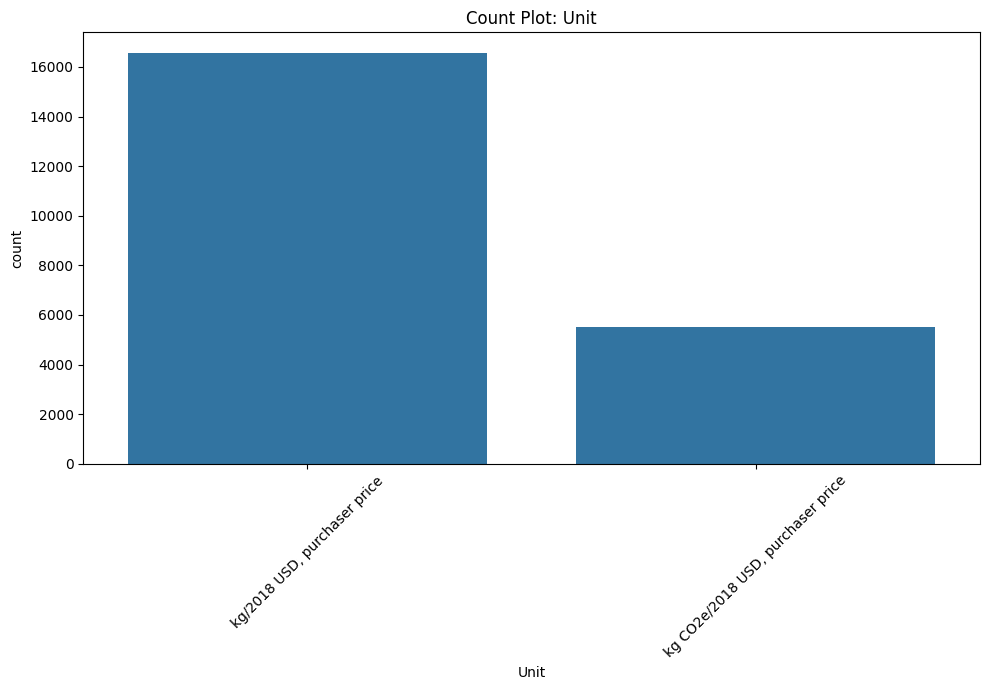

In [147]:
plt.figure(figsize=(10, 7))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

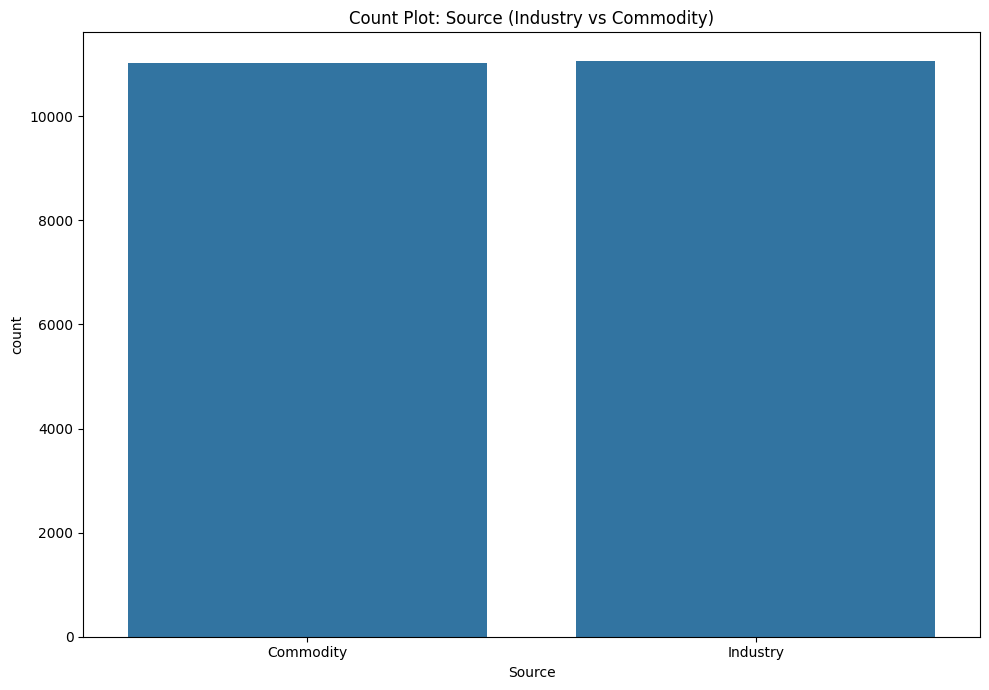

In [148]:
plt.figure(figsize=(10, 7))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.show()

# Step 3:- Encoding the data to train the model

In [149]:
enc_Code = LabelEncoder()
df['Code'] = enc_Code.fit_transform(df['Code'])

enc_Name = LabelEncoder()
df['Name'] = enc_Name.fit_transform(df['Name'])

enc_Substance = LabelEncoder()
df['Substance'] = enc_Substance.fit_transform(df['Substance'])

enc_Unit = LabelEncoder()
df['Unit'] = enc_Name.fit_transform(df['Unit'])

enc_Source = LabelEncoder()
df['Source'] = enc_Source.fit_transform(df['Source'])

df


,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,0,218,0,1,0.398,0.073,0.470,4,3,1,4,1,0,2010
1,0,218,1,1,0.001,0.001,0.002,4,3,1,1,1,0,2010
2,0,218,2,1,0.002,0.000,0.002,4,3,1,4,1,0,2010
3,0,218,3,0,0.002,0.000,0.002,3,3,1,3,1,0,2010
4,1,220,0,1,0.659,0.081,0.740,4,3,1,4,1,0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22086,393,97,3,0,0.009,0.000,0.009,4,2,1,5,1,1,2016
22087,394,534,0,1,0.000,0.000,0.000,4,2,1,5,1,1,2016
22088,394,534,1,1,0.000,0.000,0.000,4,2,1,5,1,1,2016
22089,394,534,2,1,0.000,0.000,0.000,4,2,1,5,1,1,2016


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22091 entries, 0 to 22090
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22091 non-null  int64  
 1   Name                                                    22091 non-null  int64  
 2   Substance                                               22091 non-null  int64  
 3   Unit                                                    22091 non-null  int64  
 4   Supply Chain Emission Factors without Margins           22091 non-null  float64
 5   Margins of Supply Chain Emission Factors                22091 non-null  float64
 6   Supply Chain Emission Factors with Margins              22091 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22091 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [151]:
df.shape

(22091, 14)

In [152]:
X = df.drop(columns=['Supply Chain Emission Factors with Margins'])
y = df['Supply Chain Emission Factors with Margins']

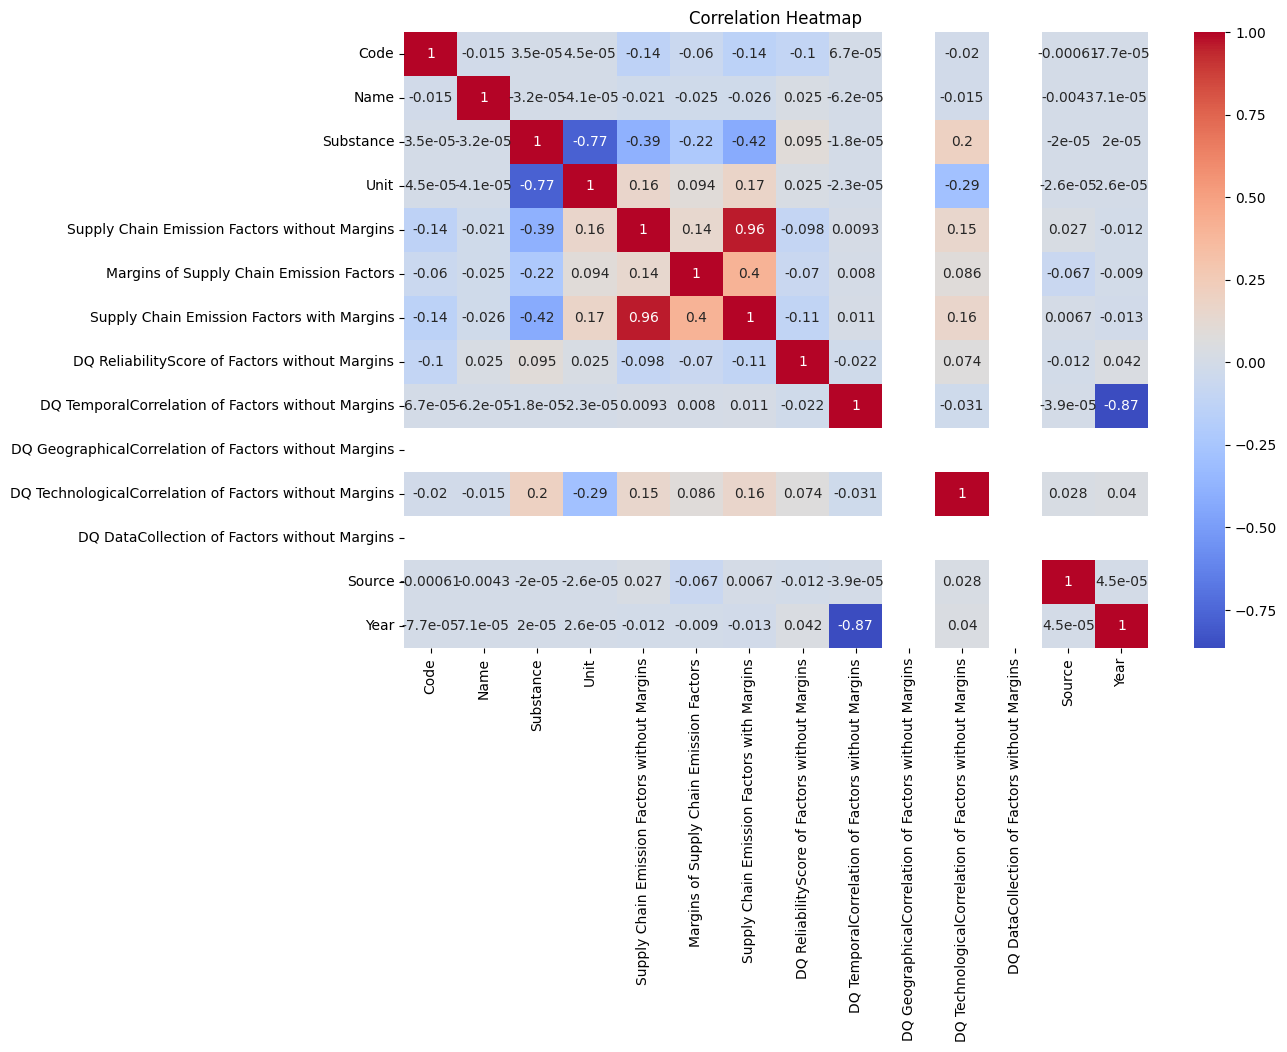

In [157]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 4:- Selecting and Training the model 

In [159]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [161]:
model = RandomForestRegressor(random_state=42)

In [162]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [163]:
y_pred = model.predict(X_test)


In [164]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

RMSE: 0.00653250212579642
R² Score: 0.9994381511776688


In [165]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [166]:
y_pred_best = best_model.predict(X_test)

print("Final RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("Final R²:", r2_score(y_test, y_pred_best))

Final RMSE: 0.006485394044898786
Final R²: 0.9994462253231617


# Step 5:- Saving the model 

In [167]:
!mkdir models


In [168]:
joblib.dump(best_model, 'models/final_model.pkl')   
joblib.dump(scaler, 'models/scaler.pkl')

['models/scaler.pkl']

In [169]:
X.columns


Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')